In [1]:
%matplotlib inline
import torch as tc
import torchvision as tv
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np

## Autograd
1. define tensor with "requires_grad=True"
2. write formula
3. call .backward()
Example: gradiant on $B=x^TAx$, $\frac{dB}{dx}=(A+A^T)x$

In [2]:
x = tc.tensor([[1],[2],[3]], requires_grad=True)
A = tc.tensor([[1,2,3],[2,4,4],[3,4,5]])
print(x)
print(A)

tensor([[ 1],
        [ 2],
        [ 3]])
tensor([[ 1,  2,  3],
        [ 2,  4,  4],
        [ 3,  4,  5]])


In [3]:
B = x.t().mm(A).mm(x)
print(B)
# x.grad.zero_()
B.backward()
print(x.grad)
actual_grad = (A+A.t()).mm(x)
print( actual_grad )

tensor([[ 136]])
tensor([[ 28],
        [ 44],
        [ 52]])
tensor([[ 28],
        [ 44],
        [ 52]])


## Logistic regression using pytorch
What do we do:
```python
step 0: load data and parameter

step 1: def forward(X):
            # pass
            return y_pred
step 2: def loss_fn(y_pred, y_target):
            # pass
            return loss
step 3: def update(loss,W_old)：
            # pass:
            return W_new
```
Done!

In [4]:
X = tc.rand([100,5])
y = tc.empty(100, dtype=tc.long).random_(3)
W = tc.rand([5,3],requires_grad=True)

In [5]:
print(X[:10])
print(y[:10])
print(W)

tensor([[ 0.5812,  0.4461,  0.5705,  0.5443,  0.8364],
        [ 0.0084,  0.3039,  0.7557,  0.4043,  0.2165],
        [ 0.4549,  0.5666,  0.9928,  0.6596,  0.8747],
        [ 0.4063,  0.8554,  0.1484,  0.3131,  0.8383],
        [ 0.8797,  0.5750,  0.4503,  0.9047,  0.4671],
        [ 0.9939,  0.5332,  0.2953,  0.0506,  0.4294],
        [ 0.5445,  0.9110,  0.8199,  0.2339,  0.1789],
        [ 0.3521,  0.3648,  0.9690,  0.5000,  0.2175],
        [ 0.9765,  0.9987,  0.5703,  0.4890,  0.0594],
        [ 0.8149,  0.7346,  0.0191,  0.2895,  0.1672]])
tensor([ 1,  0,  1,  1,  0,  0,  1,  1,  0,  2])
tensor([[ 0.8018,  0.2544,  0.5300],
        [ 0.2165,  0.4187,  0.3232],
        [ 0.5645,  0.0527,  0.2755],
        [ 0.7031,  0.3142,  0.7773],
        [ 0.4183,  0.9204,  0.1577]])


__torch.nn__ includes may classes that act like "functions"

In [6]:
logreg_loss_func = tc.nn.CrossEntropyLoss()

Now use his function to calculate the numerial loss

In [7]:
logreg_loss = logreg_loss_func(X.mm(W), y)

The call __.backward()__ to see get the gradiant

In [8]:
#W.grad.zero_()
logreg_loss.backward(retain_graph=True)
grad = W.grad
grad

tensor(1.00000e-02 *
       [[ 0.5486, -3.7213,  3.1727],
        [ 0.8755, -3.2741,  2.3986],
        [ 2.6686, -4.9537,  2.2852],
        [ 0.6502, -2.3136,  1.6634],
        [ 0.4249, -2.4068,  1.9819]])

In [9]:
with tc.no_grad():
    lr = 0.01
    W = W + grad * lr
W

tensor([[ 0.8019,  0.2540,  0.5303],
        [ 0.2166,  0.4184,  0.3234],
        [ 0.5648,  0.0522,  0.2758],
        [ 0.7031,  0.3140,  0.7774],
        [ 0.4183,  0.9202,  0.1579]])

Then we update W, we could see all difficult part are done by pytorch
## Encapsulation even more

In [10]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = tc.randn(N, D_in)
y = tc.randn(N, D_out)

In [11]:
forward_fn = tc.nn.Sequential(
    tc.nn.Linear(D_in, H),
    tc.nn.ReLU(),
    tc.nn.Linear(H, D_out),
)
loss_fn = tc.nn.MSELoss(size_average=True)

In [12]:
y_pred = forward_fn(x)
loss = loss_fn(y_pred, y)
loss

tensor(1.0997)

In [13]:
learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = forward_fn(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    # Zero the gradients before running the backward pass.
    forward_fn.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with tc.no_grad():
        for param in forward_fn.parameters():
            param -= learning_rate * param.grad

0 1.0996840000152588
1 1.099530577659607
2 1.0993759632110596
3 1.0992209911346436
4 1.0990670919418335
5 1.0989136695861816
6 1.0987579822540283
7 1.0986045598983765
8 1.0984506607055664
9 1.0982961654663086
10 1.0981428623199463
11 1.0979886054992676
12 1.097834825515747
13 1.0976808071136475
14 1.097527265548706
15 1.097372055053711
16 1.09721839427948
17 1.0970653295516968
18 1.0969122648239136
19 1.096757173538208
20 1.096604347229004
21 1.0964512825012207
22 1.0962964296340942
23 1.0961427688598633
24 1.0959898233413696
25 1.0958373546600342
26 1.0956830978393555
27 1.0955301523208618
28 1.09537672996521
29 1.0952231884002686
30 1.0950701236724854
31 1.0949167013168335
32 1.094763994216919
33 1.0946112871170044
34 1.0944582223892212
35 1.0943059921264648
36 1.0941516160964966
37 1.0939996242523193
38 1.0938466787338257
39 1.0936943292617798
40 1.0935418605804443
41 1.0933897495269775
42 1.0932366847991943
43 1.0930840969085693
44 1.0929315090179443
45 1.0927791595458984
46 1.0926

Using __torch.optim__ to simplify the result, the training above is equivalent to:

In [14]:
learning_rate = 1e-4
optimizer = tc.optim.Adam(forward_fn.parameters(), lr=learning_rate)
for t in range(500):
    y_pred = forward_fn(x)
    loss = loss_fn(y_pred, y)
    print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

0 1.027732253074646
1 1.0010449886322021
2 0.9753431081771851
3 0.950370192527771
4 0.9262723922729492
5 0.9028702974319458
6 0.8800479173660278
7 0.857866644859314
8 0.8363658785820007
9 0.8154324293136597
10 0.795068621635437
11 0.775452196598053
12 0.7563856840133667
13 0.7378247380256653
14 0.7198775410652161
15 0.7025035619735718
16 0.6856686472892761
17 0.669363260269165
18 0.6535362601280212
19 0.6381906270980835
20 0.6231862306594849
21 0.6085701584815979
22 0.5943557024002075
23 0.5804651975631714
24 0.5669506192207336
25 0.5538226366043091
26 0.5411171317100525
27 0.528744637966156
28 0.5166839361190796
29 0.50486820936203
30 0.49325594305992126
31 0.4818821847438812
32 0.47078990936279297
33 0.45995187759399414
34 0.4493201673030853
35 0.438931405544281
36 0.4287474751472473
37 0.4187738299369812
38 0.40901821851730347
39 0.3994709253311157
40 0.39015042781829834
41 0.38099151849746704
42 0.37201666831970215
43 0.363247811794281
44 0.354663610458374
45 0.3462325930595398
46 

363 1.349674789707933e-06
364 1.2827576938434504e-06
365 1.2190541838208446e-06
366 1.1584746744119911e-06
367 1.1008562523784349e-06
368 1.0460435078130104e-06
369 9.939418532667332e-07
370 9.443667181585624e-07
371 8.972216392066912e-07
372 8.524084478267469e-07
373 8.097885029201279e-07
374 7.692772783229884e-07
375 7.307468763428915e-07
376 6.941174319763377e-07
377 6.593020316358889e-07
378 6.261908538363059e-07
379 5.947277941231732e-07
380 5.64807805858436e-07
381 5.363642117117706e-07
382 5.09339429299871e-07
383 4.836655307371984e-07
384 4.592567961481109e-07
385 4.360378227374895e-07
386 4.1399593442292826e-07
387 3.9305095356212405e-07
388 3.731342985702213e-07
389 3.5421530242274457e-07
390 3.362455345268245e-07
391 3.191712210082187e-07
392 3.02939980656447e-07
393 2.87521743302932e-07
394 2.7287762804917293e-07
395 2.5897435307342676e-07
396 2.457585708270926e-07
397 2.3320717446040362e-07
398 2.2127241550151666e-07
399 2.0994782801153633e-07
400 1.9919218630093383e-07
40

## Training  CNN on MNIST
Step 0: load data set

In [15]:
def load_data():
    train_data = tv.datasets.MNIST(root='data/mnist', train=True,
                                            transform=tv.transforms.ToTensor(),
                                            download=True)
    test_data = tv.datasets.MNIST(root='data/mnist', train=False,
                                            transform=tv.transforms.ToTensor(),
                                            download=True)
    return train_data, test_data

def imshow(instance, label):
    plt.imshow(instance.reshape(28,28), cmap='gray')
    plt.title('%i' % label, fontsize = 20)
    plt.show()

train_data, test_data = load_data()
X_test = test_data.test_data.reshape(10000,1,28,28)
X_test = tc.tensor(X_test,dtype=tc.float) / 255
y_test = test_data.test_labels
import torch.utils.data as Data
train_batch = Data.DataLoader(dataset=train_data, batch_size=100,shuffle=True)

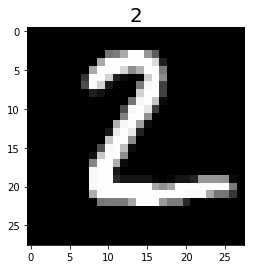

In [16]:
imshow(X_test[1], y_test[1])

Step 1: define forward function

    layer 1: Convolutional + Relu + Maxpooling
    layer 2: Convolutional + Relu + Maxpooling
    layer 3: linear
    
reference:
Conv2d:https://pytorch.org/docs/stable/nn.html?highlight=conv#torch.nn.functional.conv2d
    


In [17]:
nn = tc.nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1_conv = nn.Sequential(  # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,      # input height
                out_channels=16,    # n_filters
                kernel_size=5,      # filter size
                stride=1,           # filter movement/step
                padding=2,      # 如果想要 con2d 出来的图片长宽没有变化, padding=(kernel_size-1)/2 当 stride=1
            ),      # output shape (16, 28, 28)
            nn.ReLU(),    # activation
            nn.MaxPool2d(kernel_size=2),    # 在 2x2 空间里向下采样, output shape (16, 14, 14)
        )
        self.layer2_conv = nn.Sequential(  # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),  # output shape (32, 14, 14)
            nn.ReLU(),  # activation
            nn.MaxPool2d(2),  # output shape (32, 7, 7)
        )
        self.layer3_linear = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes
        
    def forward(self, x):
        x = self.layer1_conv(x)
        x = self.layer2_conv(x)
        x = x.view(x.size(0), -1)   # 展平多维的卷积图成 (batch_size, 32 * 7 * 7)
        output = self.layer3_linear(x)
        return output

Step 2: define loss

cross entropy:
    https://pytorch.org/docs/stable/nn.html?highlight=cross%20entropy#torch.nn.functional.cross_entropy

In [18]:
loss_func = nn.CrossEntropyLoss()

Step 3: train!

In [19]:
cnn_mnist = CNN()
optimizer = tc.optim.Adam(cnn_mnist.parameters(), lr=0.001)

During training, several consideration are needed:
1. how many round? how big is the batch each time?
```
    for each_round in epoch:
        for each_example in  example:
```
2. what about testing set?
3. what about logging?

In [21]:
for epoch in range(1):
    for step, (x, y) in enumerate(train_batch):
        output = cnn_mnist(x)
        loss = loss_func(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
        if step % 100 == 0:
            outputs = cnn_mnist(X_test)
            _, predicted = tc.max(outputs.data, 1)
            total = y_test.size(0)
            correct = (predicted == y_test).sum().item()
            accuracy = correct/total
            print('Epoch:', epoch, '|Step:', step,
                  '|train loss:%.4f' % loss.data.item(), '|test accuracy:%.4f' % accuracy)

Epoch: 0 |Step: 0 |train loss:0.2742 |test accuracy:0.9357
Epoch: 0 |Step: 100 |train loss:0.2296 |test accuracy:0.9615
Epoch: 0 |Step: 200 |train loss:0.0503 |test accuracy:0.9643
Epoch: 0 |Step: 300 |train loss:0.0928 |test accuracy:0.9720
Epoch: 0 |Step: 400 |train loss:0.1112 |test accuracy:0.9772
Epoch: 0 |Step: 500 |train loss:0.0583 |test accuracy:0.9808


## Cifar10?

Files already downloaded and verified
Files already downloaded and verified
  cat  deer plane  frog


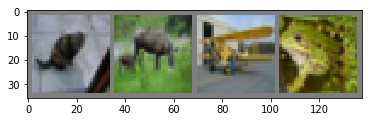

In [26]:
#release memory
import gc
del train_data
del test_data
gc.collect()

transform = tv.transforms.Compose(
    [tv.transforms.ToTensor(),
     tv.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = tv.datasets.CIFAR10(root='data/cifar10', train=True,
                                        download=True, transform=transform)
trainloader = tc.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = tv.datasets.CIFAR10(root='data/cifar10', train=False,
                                       download=True, transform=transform)
testloader = tc.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(tv.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))